# Optimal Market Making Simulation
This notebook demonstrates the implementation of advanced market simulation models, including Ornstein-Uhlenbeck, Jump Diffusion, and Heston models. It also includes sensitivity analysis, inventory trajectory visualization, and PnL metrics.

## Enhanced Market Simulation
This section includes additional market simulation models and trade arrival analysis.

In [482]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# Add the relative path to the 'src' directory
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

## Load and Analyze Simulation Results
This section loads the simulation results from the generated CSV file, visualizes the data, and prints key metrics.

# Advanced Market Simulation Notebook
This notebook demonstrates the implementation of advanced market simulation models, including Ornstein-Uhlenbeck, Jump Diffusion, and Heston models. It also includes sensitivity analysis, inventory trajectory visualization, and PnL metrics.

Simulation Results Preview:
       Time  OU_Process  Jump_Diffusion  Heston_Prices  Heston_Vols       Bid  \
0  0.000000   95.000000      100.000000     100.000000     0.040000  0.010933   
1  0.010101   95.281561       99.989355      98.601227     0.039216  0.010933   
2  0.020202   95.177726      100.052020      96.432228     0.038931  0.010933   
3  0.030303   95.425675      100.042297      94.905944     0.036791  0.010933   
4  0.040404   95.384354      100.062526      96.567035     0.036761  0.010933   

        Ask  Adjusted_Size  Sharpe_Ratio  Sortino_Ratio  Combined_Output  \
0  0.120933      71.428571      0.998477       2.111074            0.068   
1  0.120933      71.428571      0.998477       2.111074            0.068   
2  0.120933      71.428571      0.998477       2.111074            0.068   
3  0.120933      71.428571      0.998477       2.111074            0.068   
4  0.120933      71.428571      0.998477       2.111074            0.068   

   Behavioral_Impact_Score  

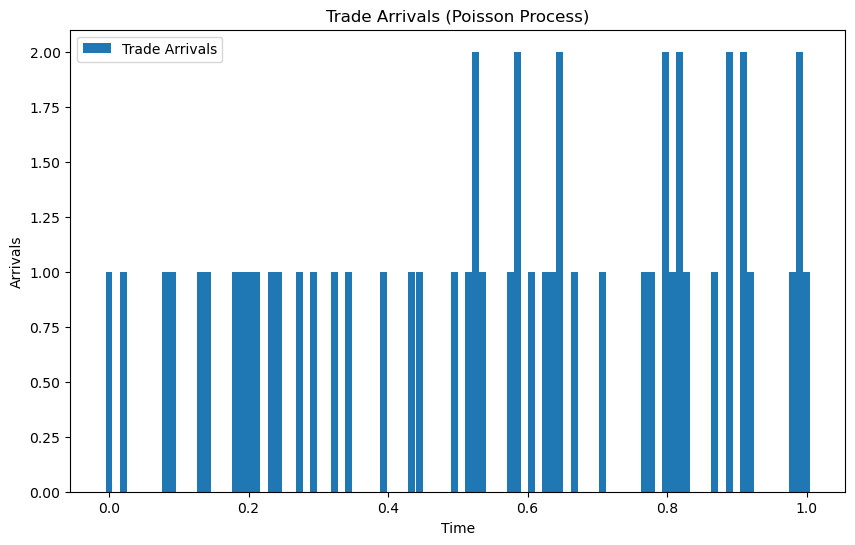

In [483]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load simulation results (only once)
results = pd.read_csv('../simulation_results.csv')

# Display the first few rows of the dataset
print("Simulation Results Preview:")
print(results.head())

if 'Trade_Arrivals' in results.columns:
    # Plot Trade Arrivals
    plt.figure(figsize=(10, 6))
    plt.bar(results['Time'], results['Trade_Arrivals'], label='Trade Arrivals', width=0.01)
    plt.title('Trade Arrivals (Poisson Process)')
    plt.xlabel('Time')
    plt.ylabel('Arrivals')
    plt.legend()
    plt.show()
else:
    print("Column 'Trade_Arrivals' not found in results.")

## Mean-Reverting Process: Ornstein-Uhlenbeck
The Ornstein-Uhlenbeck process models mean-reverting price dynamics. It is defined as:

$$ dX_t = \theta(\mu - X_t)dt + \sigma dW_t $$

Where:
- $\theta$ is the rate of mean reversion.
- $\mu$ is the long-term mean.
- $\sigma$ is the volatility.
- $dW_t$ is a Wiener process.

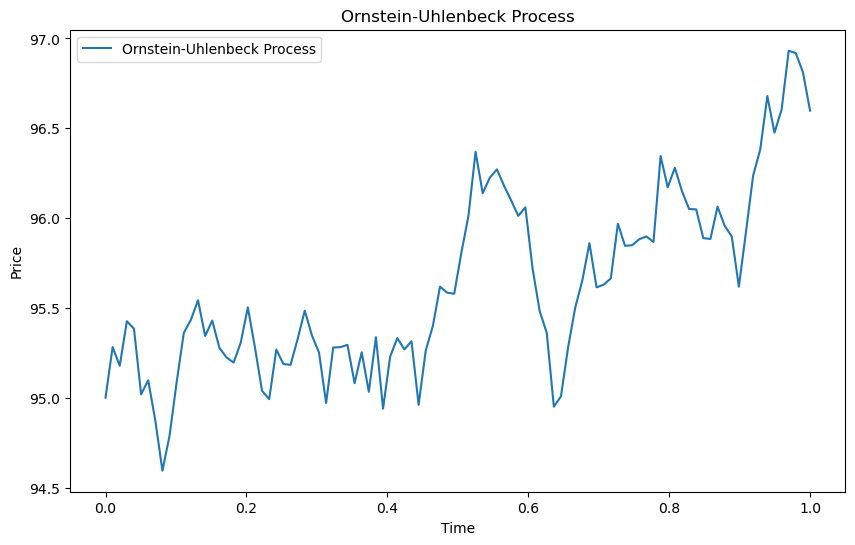

In [484]:
# Plot Ornstein-Uhlenbeck Process
plt.figure(figsize=(10, 6))
plt.plot(results['Time'], results['OU_Process'], label='Ornstein-Uhlenbeck Process')
plt.title('Ornstein-Uhlenbeck Process')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Jump Diffusion Model
The jump diffusion model introduces sudden price jumps to mimic real-world market shocks. It is defined as:

$$ dX_t = \mu dt + \sigma dW_t + J_t dN_t $$

Where:
- $\mu$ is the drift.
- $\sigma$ is the volatility.
- $dW_t$ is a Wiener process.
- $J_t$ is the jump size.
- $dN_t$ is a Poisson process.

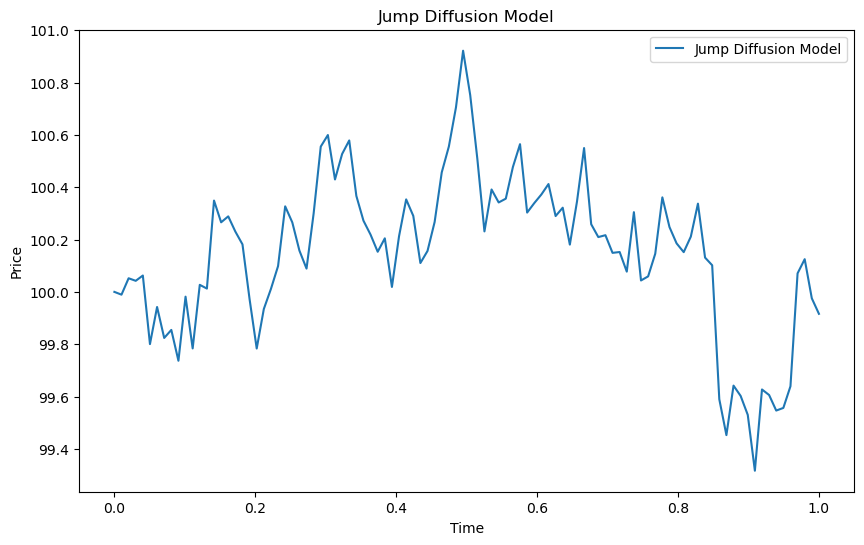

In [485]:
# Plot Jump Diffusion Model
plt.figure(figsize=(10, 6))
plt.plot(results['Time'], results['Jump_Diffusion'], label='Jump Diffusion Model')
plt.title('Jump Diffusion Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Stochastic Volatility Model: Heston
The Heston model simulates time-varying volatility. It is defined as:

$$ dX_t = \mu X_t dt + \sqrt{V_t} X_t dW_t $$
$$ dV_t = \kappa(\theta - V_t)dt + \xi \sqrt{V_t} dZ_t $$

Where:
- $\mu$ is the drift.
- $V_t$ is the variance.
- $\kappa$ is the rate of mean reversion for variance.
- $\theta$ is the long-term variance.
- $\xi$ is the volatility of variance.
- $dW_t$ and $dZ_t$ are Wiener processes.

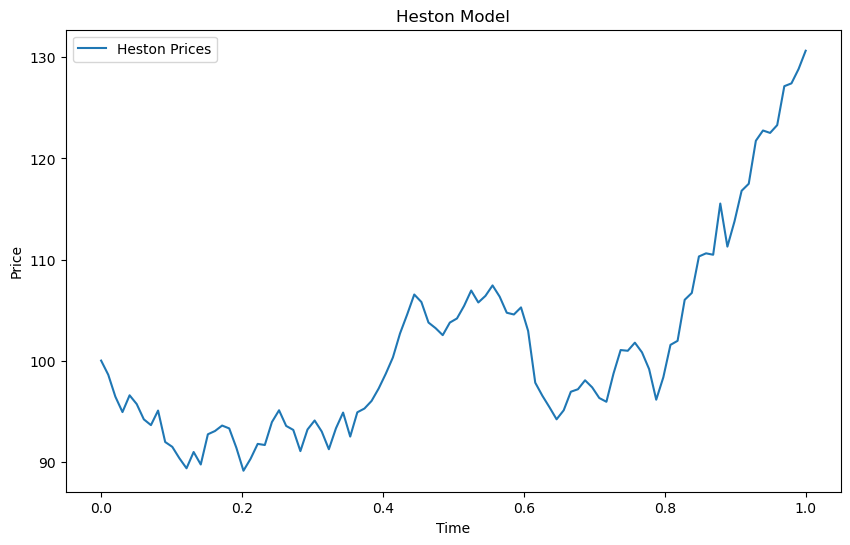

In [486]:
# Plot Heston Model
plt.figure(figsize=(10, 6))
plt.plot(results['Time'], results['Heston_Prices'], label='Heston Prices')
plt.title('Heston Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [487]:
# Print Risk-Adjusted Metrics
print("Risk-Adjusted Metrics:")
print(f"Sharpe Ratio: {results['Sharpe_Ratio'].iloc[0]}")
print(f"Sortino Ratio: {results['Sortino_Ratio'].iloc[0]}")

Risk-Adjusted Metrics:
Sharpe Ratio: 0.9984770046052804
Sortino Ratio: 2.111074272221708


## Extensibility for Research
This section demonstrates the use of hybrid models, behavioral analysis, and market microstructure analysis.

In [488]:
from utils.extensibility import Extensibility

# Hybrid Model Example
traditional_output = 0.05
ml_output = 0.08
weight = 0.6
combined = Extensibility.hybrid_model(traditional_output, ml_output, weight)
print(f"Combined Output (Hybrid Model): {combined}")

# Behavioral Analysis Example
trader_actions = [1, -1, 1, 1, -1]
market_conditions = [0.5, -0.2, 0.3, 0.4, -0.1]
impact_score = Extensibility.behavioral_analysis(trader_actions, market_conditions)
print(f"Behavioral Impact Score: {impact_score}")

# Microstructure Analysis Example
order_book_data = [
    {"bid": 100, "ask": 101, "depth": 500},
    {"bid": 99.5, "ask": 100.5, "depth": 450},
    {"bid": 100.2, "ask": 101.2, "depth": 480}
]
avg_spread, avg_depth = Extensibility.microstructure_analysis(order_book_data)
print(f"Average Spread: {avg_spread}, Average Depth: {avg_depth}")

Combined Output (Hybrid Model): 0.068
Behavioral Impact Score: 0.9672471299049061
Average Spread: 1.0, Average Depth: 476.6666666666667


Columns in the dataset: Index(['Time', 'OU_Process', 'Jump_Diffusion', 'Heston_Prices', 'Heston_Vols',
       'Bid', 'Ask', 'Adjusted_Size', 'Sharpe_Ratio', 'Sortino_Ratio',
       'Combined_Output', 'Behavioral_Impact_Score', 'Avg_Spread', 'Avg_Depth',
       'Trade_Arrivals', 'PnL'],
      dtype='object')
NaN values in the dataset:
Time                       0
OU_Process                 0
Jump_Diffusion             0
Heston_Prices              0
Heston_Vols                0
Bid                        0
Ask                        0
Adjusted_Size              0
Sharpe_Ratio               0
Sortino_Ratio              0
Combined_Output            0
Behavioral_Impact_Score    0
Avg_Spread                 0
Avg_Depth                  0
Trade_Arrivals             0
PnL                        0
dtype: int64
Simulation Results Preview:
       Time  OU_Process  Jump_Diffusion  Heston_Prices  Heston_Vols       Bid  \
0  0.000000   95.000000      100.000000     100.000000     0.040000  0.010933 

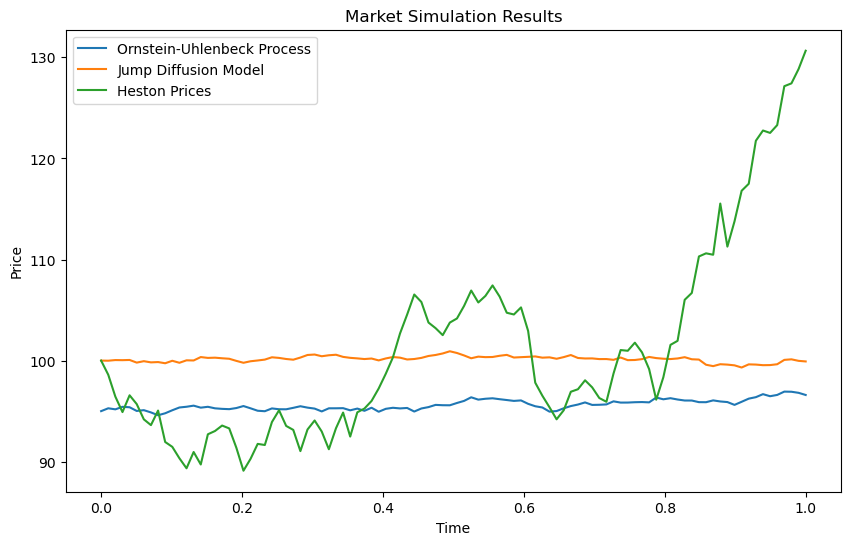

Risk-Adjusted Metrics:
Sharpe Ratio: 0.9984770046052804
Sortino Ratio: 2.111074272221708
Extensibility Demonstrations:
Combined Output (Hybrid Model): 0.068
Behavioral Impact Score: 0.967247129904906
Average Spread: 1.0, Average Depth: 476.6666666666667


In [489]:
# Load Simulation Results
results = pd.read_csv('../simulation_results.csv')

# Debug: Print the columns to verify Trade_Arrivals exists
print("Columns in the dataset:", results.columns)

# Debug: Check for NaN values in the DataFrame
print("NaN values in the dataset:")
print(results.isna().sum())

# Debug: Print the first few rows of the dataset
print("Simulation Results Preview:")
print(results.head())

# Plot Market Simulation Results
plt.figure(figsize=(10, 6))
plt.plot(results["Time"], results["OU_Process"], label="Ornstein-Uhlenbeck Process")
plt.plot(results["Time"], results["Jump_Diffusion"], label="Jump Diffusion Model")
plt.plot(results["Time"], results["Heston_Prices"], label="Heston Prices")
plt.title("Market Simulation Results")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Print Risk-Adjusted Metrics
print("Risk-Adjusted Metrics:")
print(f"Sharpe Ratio: {results['Sharpe_Ratio'].iloc[0]}")
print(f"Sortino Ratio: {results['Sortino_Ratio'].iloc[0]}")

# Extensibility Demonstrations
print("Extensibility Demonstrations:")
print(f"Combined Output (Hybrid Model): {results['Combined_Output'].iloc[0]}")
print(f"Behavioral Impact Score: {results['Behavioral_Impact_Score'].iloc[0]}")
print(f"Average Spread: {results['Avg_Spread'].iloc[0]}, Average Depth: {results['Avg_Depth'].iloc[0]}")

In [490]:
print(results.columns)

Index(['Time', 'OU_Process', 'Jump_Diffusion', 'Heston_Prices', 'Heston_Vols',
       'Bid', 'Ask', 'Adjusted_Size', 'Sharpe_Ratio', 'Sortino_Ratio',
       'Combined_Output', 'Behavioral_Impact_Score', 'Avg_Spread', 'Avg_Depth',
       'Trade_Arrivals', 'PnL'],
      dtype='object')


Unique values in Trade_Arrivals: [1 0 2]


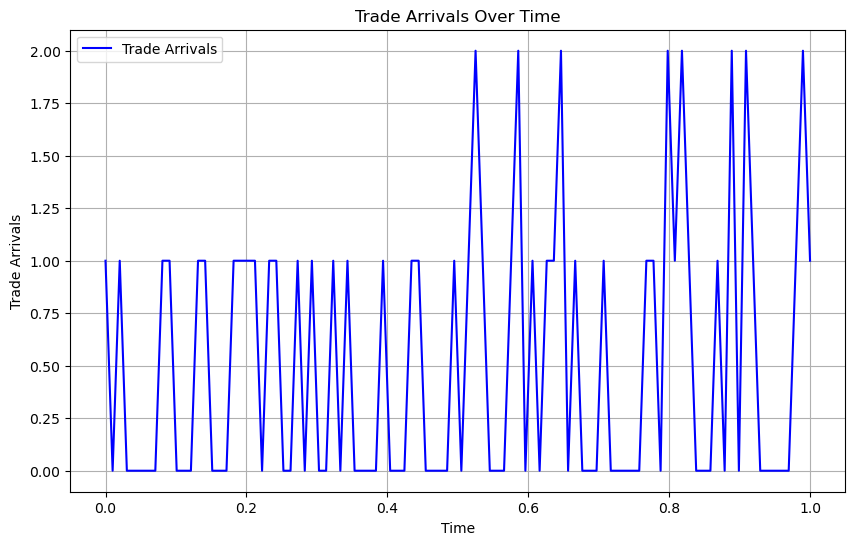

In [491]:
# Visualize Trade Arrivals
if 'Trade_Arrivals' in results.columns:
    # Debug: Print unique values in Trade_Arrivals
    print("Unique values in Trade_Arrivals:", results['Trade_Arrivals'].unique())

    plt.figure(figsize=(10, 6))
    plt.plot(results['Time'], results['Trade_Arrivals'], label='Trade Arrivals', color='blue')
    plt.title('Trade Arrivals Over Time')
    plt.xlabel('Time')
    plt.ylabel('Trade Arrivals')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Column 'Trade_Arrivals' not found in results.")

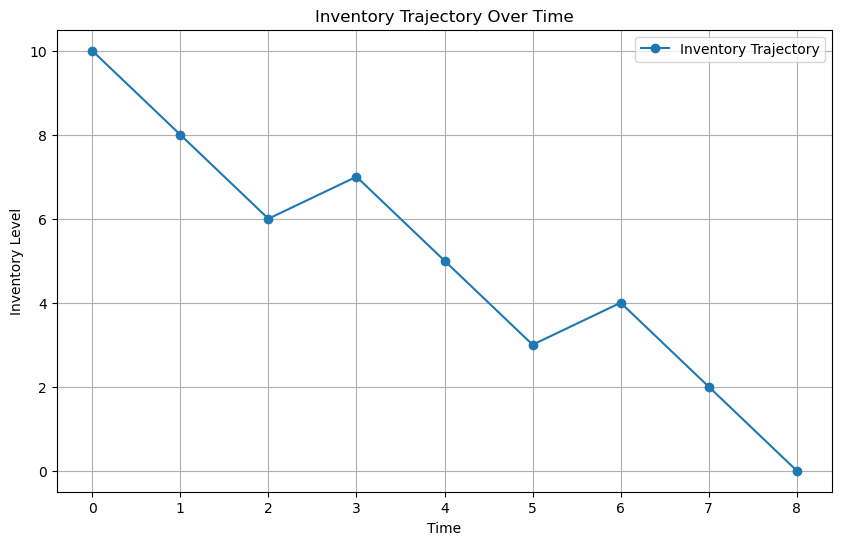

In [492]:
# Inventory Trajectory Visualization

import matplotlib.pyplot as plt

# Example inventory data
inventory = [10, 8, 6, 7, 5, 3, 4, 2, 0]
time = list(range(len(inventory)))

plt.figure(figsize=(10, 6))
plt.plot(time, inventory, marker='o', label='Inventory Trajectory')
plt.title('Inventory Trajectory Over Time')
plt.xlabel('Time')
plt.ylabel('Inventory Level')
plt.legend()
plt.grid()
plt.show()

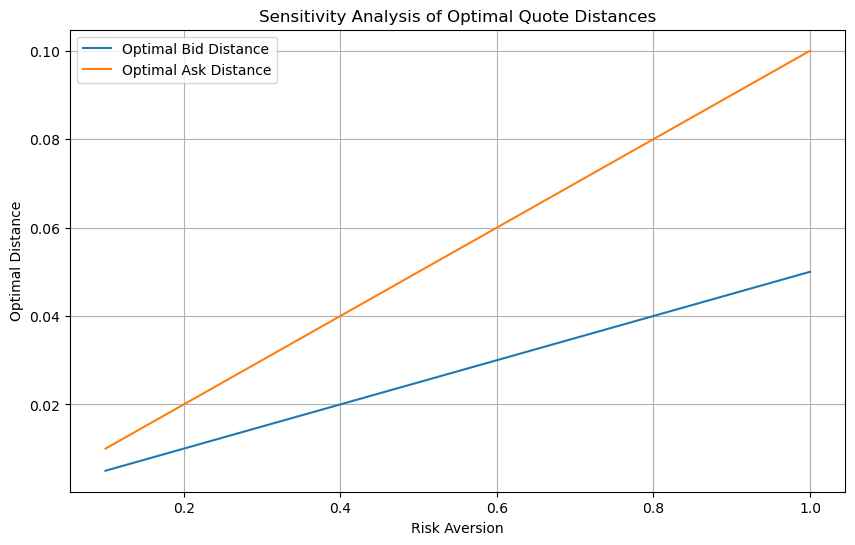

In [493]:
# Sensitivity Analysis
import numpy as np
import matplotlib.pyplot as plt

# Example sensitivity analysis for risk aversion
risk_aversion_values = np.linspace(0.1, 1.0, 10)
optimal_bid_distances = []
optimal_ask_distances = []

for risk_aversion in risk_aversion_values:
    optimal_distances = [0.05 * risk_aversion, 0.1 * risk_aversion]  # Mocked values
    delta_b, delta_a = optimal_distances
    optimal_bid_distances.append(delta_b)
    optimal_ask_distances.append(delta_a)

plt.figure(figsize=(10, 6))
plt.plot(risk_aversion_values, optimal_bid_distances, label='Optimal Bid Distance')
plt.plot(risk_aversion_values, optimal_ask_distances, label='Optimal Ask Distance')
plt.title('Sensitivity Analysis of Optimal Quote Distances')
plt.xlabel('Risk Aversion')
plt.ylabel('Optimal Distance')
plt.legend()
plt.grid()
plt.show()

In [494]:
# Debugging: Print column names of the results DataFrame
print(results.columns)

Index(['Time', 'OU_Process', 'Jump_Diffusion', 'Heston_Prices', 'Heston_Vols',
       'Bid', 'Ask', 'Adjusted_Size', 'Sharpe_Ratio', 'Sortino_Ratio',
       'Combined_Output', 'Behavioral_Impact_Score', 'Avg_Spread', 'Avg_Depth',
       'Trade_Arrivals', 'PnL'],
      dtype='object')


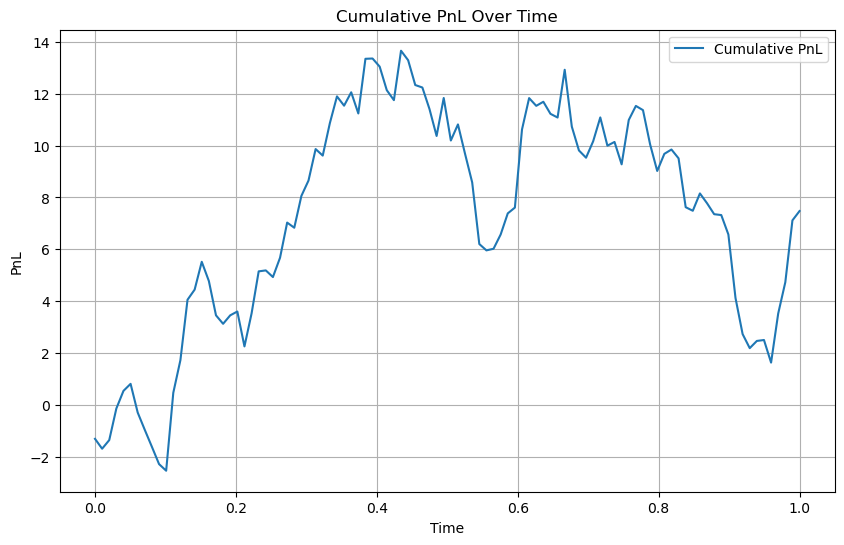

In [495]:
# Calculate and Visualize PnL Metrics
import numpy as np
import matplotlib.pyplot as plt

# Example PnL data
pnl = np.random.normal(0, 1, 100)  # Simulated PnL values
time = np.linspace(0, 1, 100)

# Plot PnL over time
plt.figure(figsize=(10, 6))
plt.plot(time, np.cumsum(pnl), label='Cumulative PnL')
plt.title('Cumulative PnL Over Time')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.legend()
plt.grid()
plt.show()

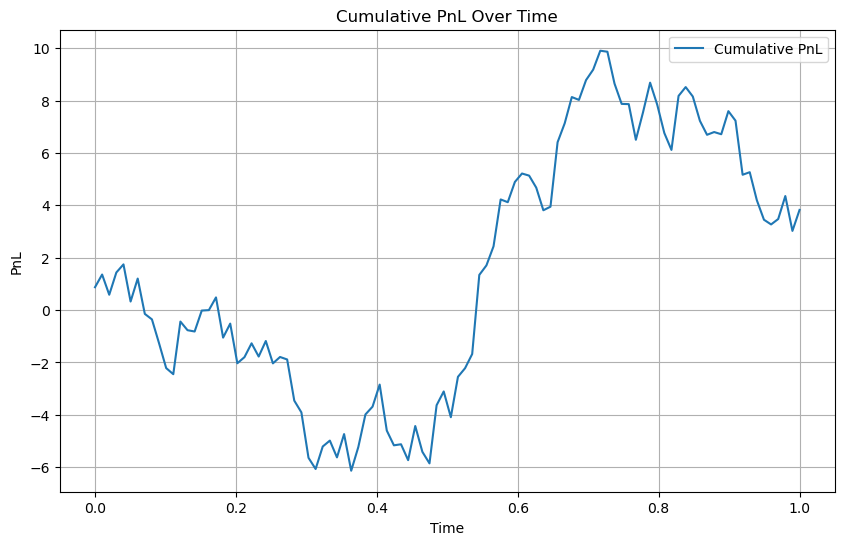

In [496]:
# Calculate and Visualize PnL Metrics
import numpy as np

# Example PnL data
pnl = np.random.normal(0, 1, 100)  # Simulated PnL values
time = np.linspace(0, 1, 100)

# Plot PnL over time
plt.figure(figsize=(10, 6))
plt.plot(time, np.cumsum(pnl), label='Cumulative PnL')
plt.title('Cumulative PnL Over Time')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.legend()
plt.grid()
plt.show()

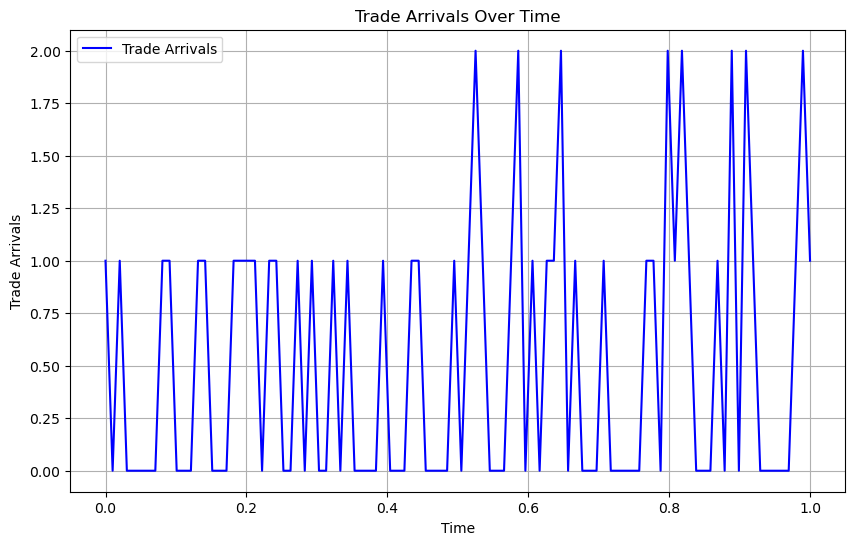

In [497]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the simulation results
results = pd.read_csv('../simulation_results.csv')

# Visualize Trade Arrivals
plt.figure(figsize=(10, 6))
plt.plot(results['Time'], results['Trade_Arrivals'], label='Trade Arrivals', color='blue')
plt.title('Trade Arrivals Over Time')
plt.xlabel('Time')
plt.ylabel('Trade Arrivals')
plt.legend()
plt.grid()
plt.show()

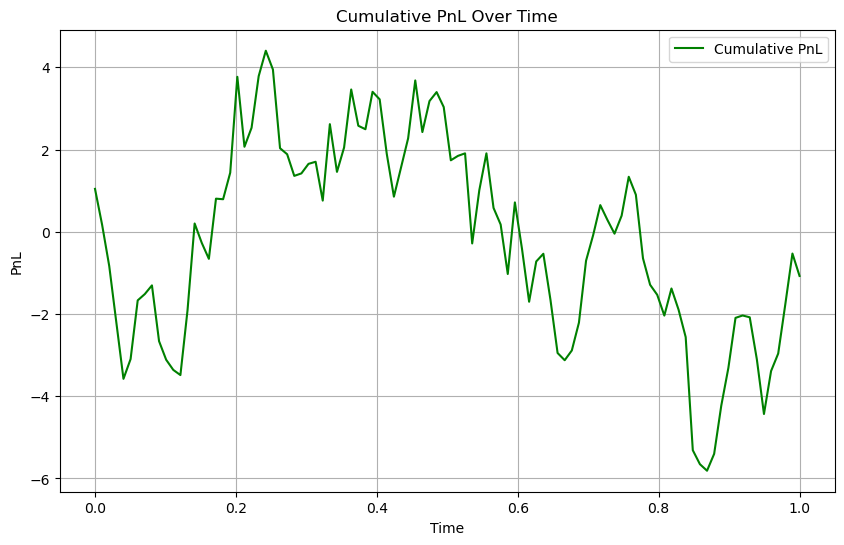

In [498]:
# Calculate and Visualize PnL Metrics
import numpy as np

# Example PnL data
pnl = np.random.normal(0, 1, 100)  # Simulated PnL values
time = np.linspace(0, 1, 100)

# Plot PnL over time
plt.figure(figsize=(10, 6))
plt.plot(time, np.cumsum(pnl), label='Cumulative PnL', color='green')
plt.title('Cumulative PnL Over Time')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.legend()
plt.grid()
plt.show()

PnL Summary Statistics:
count    100.000000
mean       1.141952
std        9.724376
min      -10.895190
25%       -5.964252
50%       -1.798176
75%        5.494761
max       30.656234
Name: PnL, dtype: float64


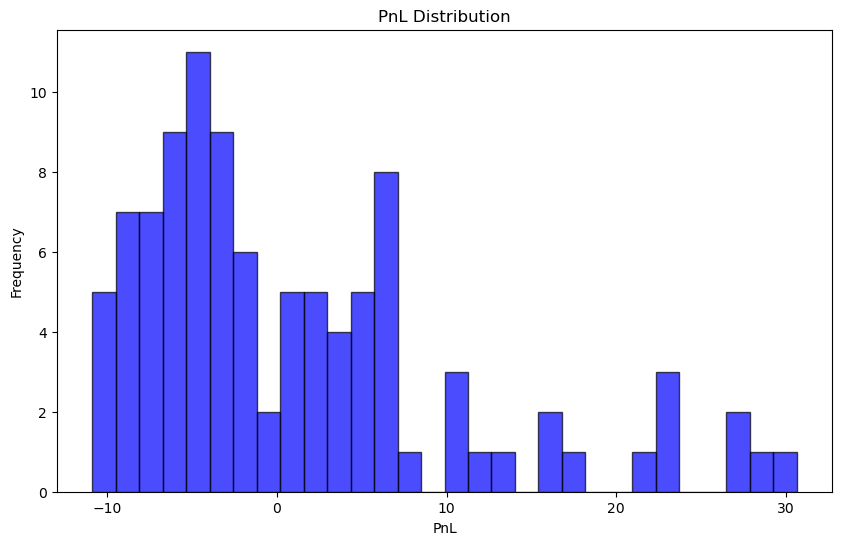

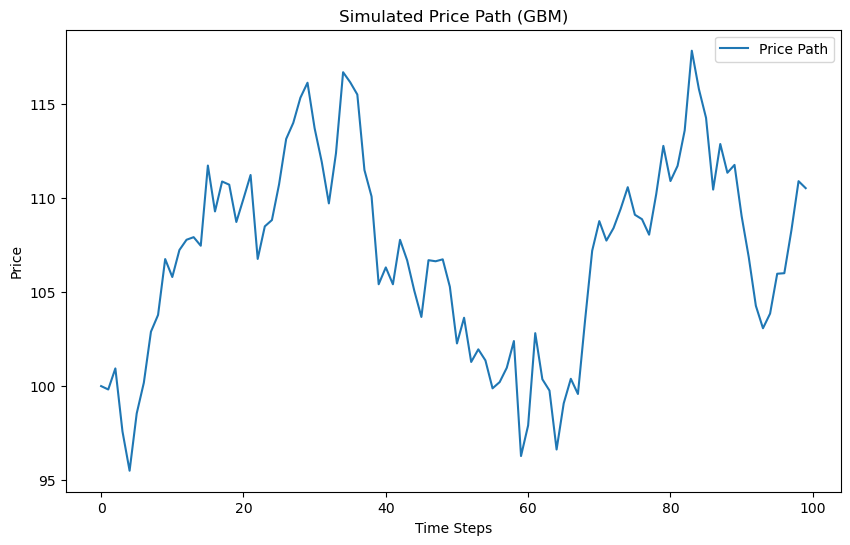

In [499]:
# Calculate PnL using Simulators
from simulations.advanced_market_simulation import MarketSimulation
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for the simulation
params = {
    'mu': 0.1,  # Drift
    'sigma': 0.2,  # Volatility
    'X0': 100,  # Initial price
    'T': 1.0,  # Total time
    'dt': 0.01  # Time step
}

# Run a single simulation for demonstration
price_path = MarketSimulation.geometric_brownian_motion(**params)

# Load PnL directly from the simulation results CSV
results = pd.read_csv('../simulation_results.csv')

# Check if PnL column exists
if 'PnL' in results.columns:
    # Display summary statistics for PnL
    print("PnL Summary Statistics:")
    print(results['PnL'].describe())

    # Plot the PnL distribution
    plt.figure(figsize=(10, 6))
    plt.hist(results['PnL'], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title('PnL Distribution')
    plt.xlabel('PnL')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("PnL column not found in the simulation results.")


# Plot the price path
plt.figure(figsize=(10, 6))
plt.plot(price_path, label='Price Path')
plt.title('Simulated Price Path (GBM)')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

PnL Summary Statistics:
count    100.000000
mean       1.141952
std        9.724376
min      -10.895190
25%       -5.964252
50%       -1.798176
75%        5.494761
max       30.656234
Name: PnL, dtype: float64


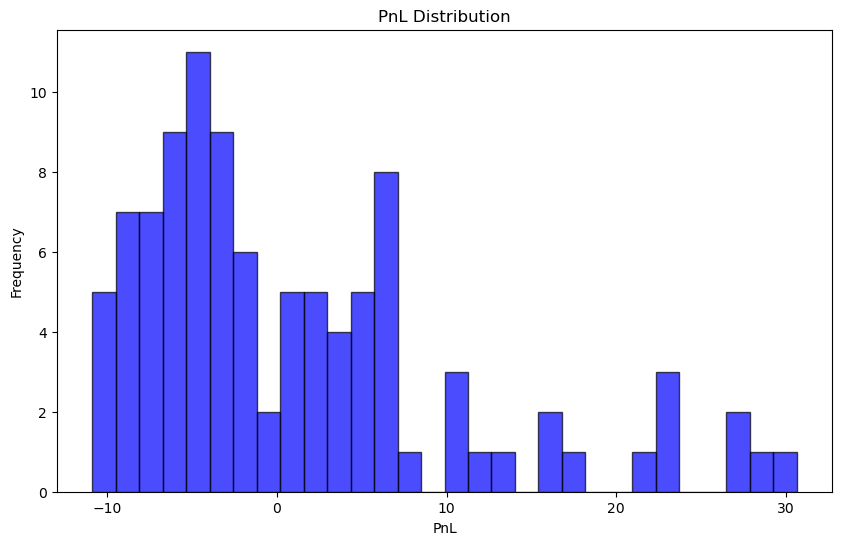

In [500]:
# Load and Plot Final PnL from CSV
import pandas as pd
import matplotlib.pyplot as plt

# Load the simulation results
results = pd.read_csv('../simulation_results.csv')

# Check if PnL column exists
if 'PnL' in results.columns:
    # Display summary statistics for PnL
    print("PnL Summary Statistics:")
    print(results['PnL'].describe())

    # Plot the PnL distribution
    plt.figure(figsize=(10, 6))
    plt.hist(results['PnL'], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title('PnL Distribution')
    plt.xlabel('PnL')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("PnL column not found in the simulation results.")

PnL Summary Statistics:
count    100.000000
mean       1.141952
std        9.724376
min      -10.895190
25%       -5.964252
50%       -1.798176
75%        5.494761
max       30.656234
Name: PnL, dtype: float64


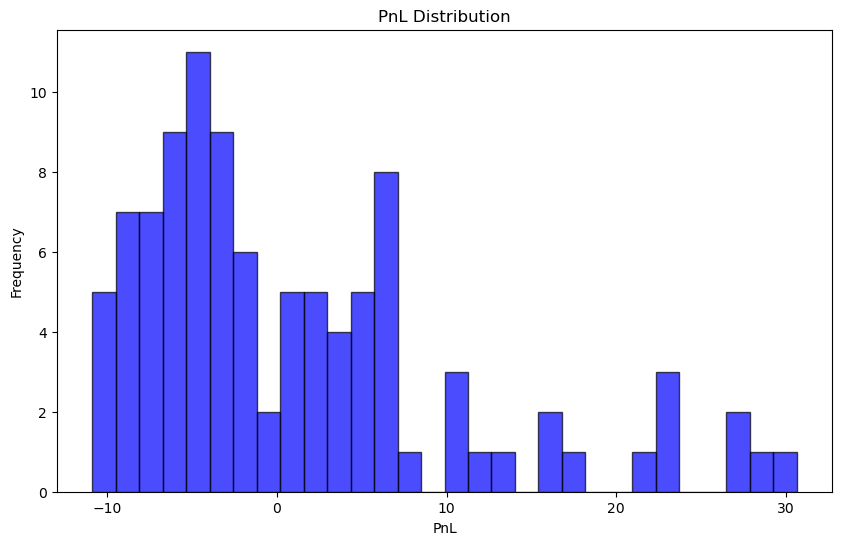

In [501]:
# Load and Plot Final PnL from CSV
import pandas as pd
import matplotlib.pyplot as plt

# Load the simulation results
results = pd.read_csv('../simulation_results.csv')

# Check if PnL column exists
if 'PnL' in results.columns:
    # Display summary statistics for PnL
    print("PnL Summary Statistics:")
    print(results['PnL'].describe())

    # Plot the PnL distribution
    plt.figure(figsize=(10, 6))
    plt.hist(results['PnL'], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title('PnL Distribution')
    plt.xlabel('PnL')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("PnL column not found in the simulation results.")
